In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [164]:
DF_PATH="..\data\processed\dataframe.pkl"
FIG_DIR=r"..\reports\figures"
EXPORT_FEATURES_DIR='..\data\processed'

In [26]:
raw_df=pd.read_pickle(DF_PATH)

df=raw_df.copy()
raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [29]:
ROLE_COLS=['DevType']
TECH_COLS=['LanguageHaveWorkedWith',
           'DatabaseHaveWorkedWith',
           'WebframeHaveWorkedWith',
           'MiscTechHaveWorkedWith',
           'ToolsTechHaveWorkedWith',
            ]

In [30]:
Benaizer=MultiLabelBinarizer()
encoded_dfs={}
for col in ROLE_COLS+TECH_COLS:
    col_encoded=Benaizer.fit_transform(df[col])
    encoded_df=pd.DataFrame(col_encoded,columns=Benaizer.classes_)
    encoded_dfs[col]=encoded_df
encoded_dfs=pd.concat(encoded_dfs,axis=1)
encoded_dfs.head()



DevType                           \
  Academic researcher Data or business analyst   
0                   0                        0   
1                   0                        0   
2                   0                        0   
3                   0                        0   
4                   0                        0   

                                                                        \
  Data scientist or machine learning specialist Database administrator   
0                                             0                      0   
1                                             0                      0   
2                                             0                      0   
3                                             0                      0   
4                                             0                      0   

                                                                        \
  Designer DevOps specialist Developer, QA or test Developer, back-end   
0        0                 0                     0                   0   
1        0                 0                     0                   0   
2        0                 0                     0                   0   
3        0                 0                     0                   0   
4        0                 0                     0                   0   

                                                 \
  Developer, desktop or enterprise applications   
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

                                               ... ToolsTechHaveWorkedWith  \
  Developer, embedded applications or devices  ...                    Flow   
0                                           0  ...                       0   
1                                           0  ...                       0   
2                                           0  ...                       0   
3                                           0  ...                       0   
4                                           0  ...                       0   

                                                                              
  Git Kubernetes Pulumi Puppet Terraform Unity 3D Unreal Engine Xamarin Yarn  
0   0          0      0      0         0        0             0       0    0  
1   1          0      0      0         0        0             0       0    1  
2   0          0      0      0         0        0             0       0    0  
3   0          0      0      0         0        0             0       0    0  
4   1          1      0      0         0        0             0       0    1  

[5 rows x 122 columns]

In [31]:
encoded_dfs['DevType']

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Other (please specify):,Product manager,Scientist,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
83435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83436,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83437,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
skills=encoded_dfs.drop("DevType",axis=1).copy()
# skillsskills.droplevel(level=0,axis=1)
# skills1
print(skills.shape)
scaler=StandardScaler()
skills_std=scaler.fit_transform(skills)


(83439, 97)


In [22]:
skills_std.shape

(83439, 125)

In [53]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=3,
                       learning_rate=0.01,
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**10,
                       random_state=0).fit_transform(skills_std.T)
tsne_projection.shape

c:\Users\Mohamed Mosaad\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(97, 2)

In [54]:
tsne_projection=pd.DataFrame(tsne_projection,index=skills.columns)
tsne_projection

0          1
LanguageHaveWorkedWith  APL            -2.168851  11.969584
                        Assembly       15.114695  17.959005
                        Bash/Shell     21.997387   2.740927
                        C              15.146166  19.675104
                        C#            -28.259548  21.548025
...                                          ...        ...
ToolsTechHaveWorkedWith Terraform      17.849140  -8.583298
                        Unity 3D      -15.093195  31.380449
                        Unreal Engine -14.237149  31.764242
                        Xamarin       -25.587889  23.975445
                        Yarn          -17.745203 -24.252546

[97 rows x 2 columns]

In [55]:
tsne_projection.droplevel(0)[1]

APL              11.969584
Assembly         17.959005
Bash/Shell        2.740927
C                19.675104
C#               21.548025
                   ...    
Terraform        -8.583298
Unity 3D         31.380449
Unreal Engine    31.764242
Xamarin          23.975445
Yarn            -24.252546
Name: 1, Length: 97, dtype: float32

In [64]:
print(tsne_projection.droplevel(0)[0][0])

-2.1688511


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_33904\2530046623.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(tsne_projection.droplevel(0)[0][0])


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_33904\2901777737.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(tsne_projection.droplevel(0)[0][i],tsne_projection.droplevel(0)[1][i],label)


Text(0, 0.5, 'Component 2')

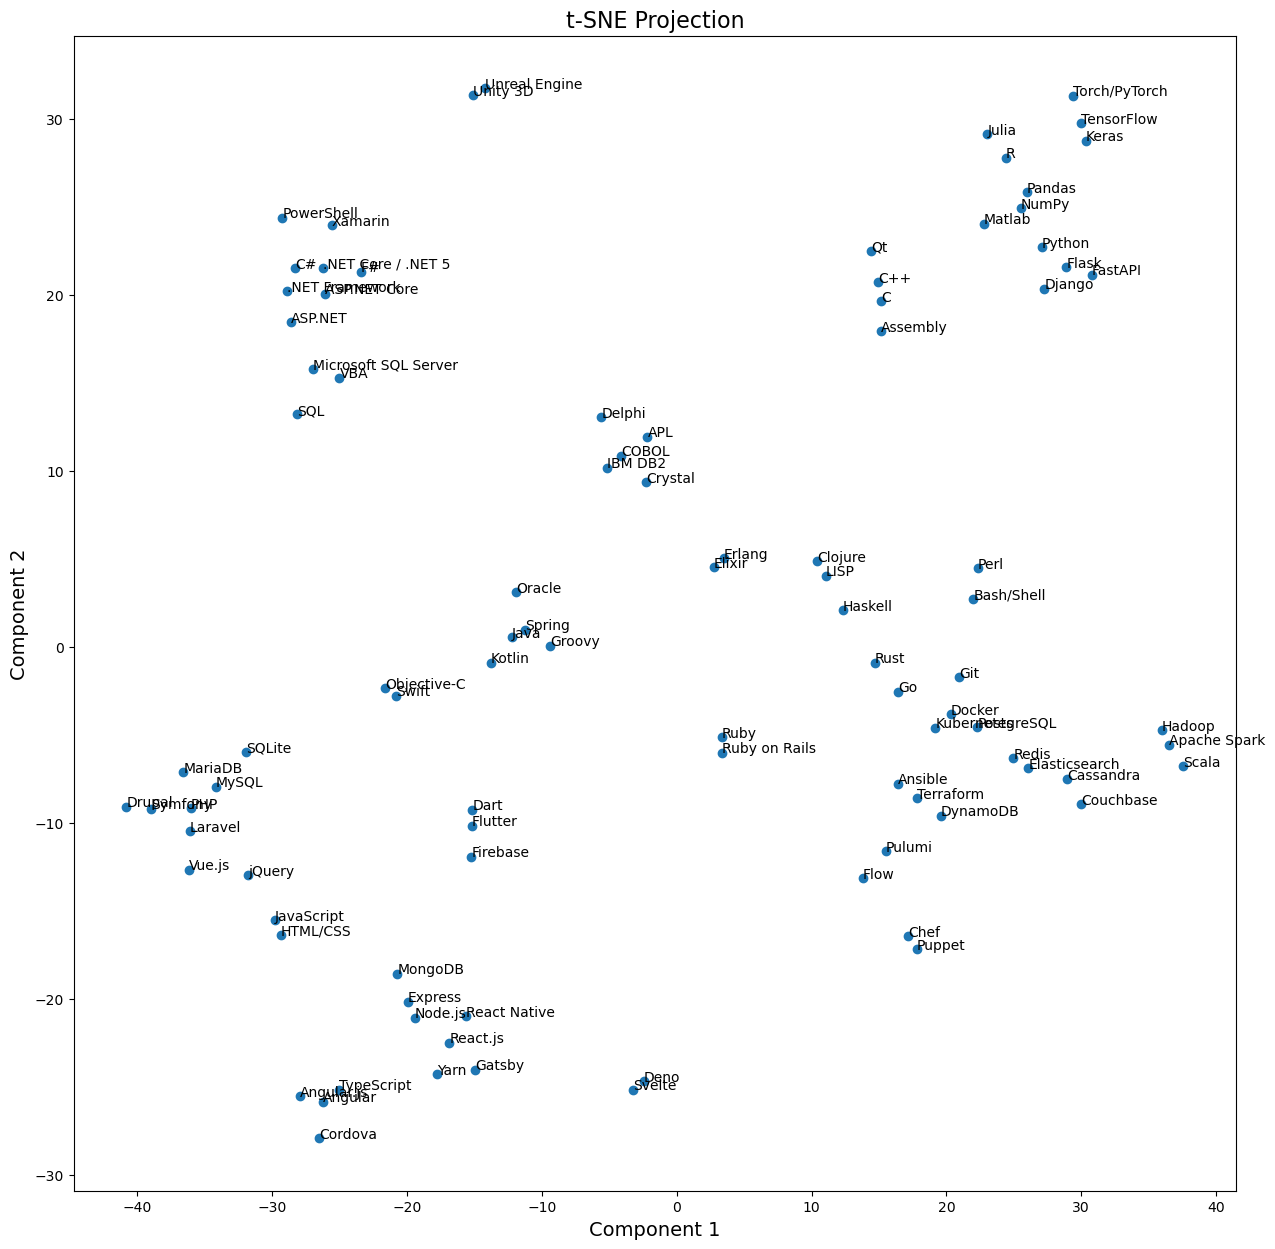

In [68]:
plt.figure(figsize=(15, 15))

plt.scatter(tsne_projection[0],tsne_projection[1])
for i ,label in enumerate(tsne_projection.droplevel(0).index):
    plt.text(tsne_projection.droplevel(0)[0][i],tsne_projection.droplevel(0)[1][i],label)

plt.title('t-SNE Projection', fontsize=16)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)

In [83]:
n_cluster=np.arange(10,25)
silhouette_scores=[]
for i in n_cluster:
    cluster=AgglomerativeClustering(n_clusters=i,linkage='ward')
    prediction=cluster.fit_predict(tsne_projection)
    # print(prediction)
    silhouette_scores.append(silhouette_score(tsne_projection,prediction))
    


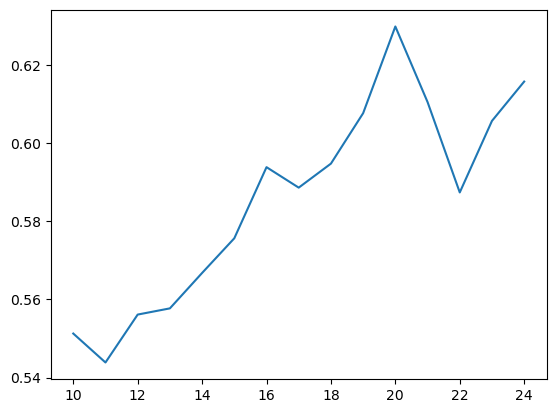

In [84]:
plt.plot(n_cluster,silhouette_scores)

In [86]:
cluster=AgglomerativeClustering(n_clusters=20)
predictions=cluster.fit_predict(tsne_projection)

In [106]:
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.droplevel(0).index, 
                 color=predictions)
fig.update_layout(width=1400,height=900)
fig.show()


In [111]:
predictions=["feature_" +  str(num) for num in predictions]
predictions

['feature_8',
 'feature_4',
 'feature_18',
 'feature_4',
 'feature_1',
 'feature_4',
 'feature_8',
 'feature_2',
 'feature_8',
 'feature_10',
 'feature_8',
 'feature_2',
 'feature_2',
 'feature_1',
 'feature_3',
 'feature_13',
 'feature_16',
 'feature_2',
 'feature_13',
 'feature_16',
 'feature_0',
 'feature_13',
 'feature_2',
 'feature_0',
 'feature_5',
 'feature_19',
 'feature_7',
 'feature_18',
 'feature_1',
 'feature_0',
 'feature_0',
 'feature_15',
 'feature_3',
 'feature_1',
 'feature_17',
 'feature_19',
 'feature_14',
 'feature_1',
 'feature_6',
 'feature_6',
 'feature_3',
 'feature_6',
 'feature_10',
 'feature_8',
 'feature_7',
 'feature_1',
 'feature_5',
 'feature_7',
 'feature_13',
 'feature_3',
 'feature_6',
 'feature_7',
 'feature_1',
 'feature_1',
 'feature_14',
 'feature_14',
 'feature_0',
 'feature_7',
 'feature_5',
 'feature_0',
 'feature_0',
 'feature_5',
 'feature_7',
 'feature_5',
 'feature_15',
 'feature_13',
 'feature_9',
 'feature_7',
 'feature_7',
 'feature_16',


In [137]:
aa=dict(tsne_projection.droplevel(0).index.groupby(predictions))
list(aa["feature_0"])

['Julia',
 'Matlab',
 'Python',
 'R',
 'Django',
 'FastAPI',
 'Flask',
 'Keras',
 'NumPy',
 'Pandas',
 'TensorFlow',
 'Torch/PyTorch']

In [154]:
encoded_dfs.droplevel(0,axis=1)

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Flow,Git,Kubernetes,Pulumi,Puppet,Terraform,Unity 3D,Unreal Engine,Xamarin,Yarn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
83435,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
83436,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
83437,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [160]:
new_data={}
for feature,classes in aa.items():
    # print(feature)
    # print(list(calsses))
    new_data[feature]=encoded_dfs.droplevel(0,axis=1)[classes].sum(axis=1)
new_data=pd.DataFrame(new_data)

In [161]:
new_data

,feature_0,feature_1,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0,0,0,0,0,0,0,0,2,0,0,2,0,1,1,0,0,4,0,0
1,2,0,0,0,0,0,2,0,1,0,0,0,0,3,0,1,0,1,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0
3,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,1,2,1,0,0,4,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,1,0,0,0,2,0,0,0,0,0,0,1,2,0,0,0,1,0,0
83435,1,0,2,2,0,0,0,1,1,0,0,0,0,2,1,1,1,4,0,0
83436,6,0,0,0,0,2,0,0,0,1,0,0,0,6,0,1,2,0,0,0
83437,7,0,0,0,0,0,0,0,1,0,1,0,0,5,0,4,3,0,0,0


In [162]:
import os

In [166]:
feature_path=os.path.join(EXPORT_FEATURES_DIR,"feature_skills_clusters.pkl")
feature_path
new_data.to_pickle(feature_path)